In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from datetime import datetime

In [54]:
def plot_results(df, title, roll=0):
    r = np.array(df['setpoint_phi']) #Setpoint
    angle = np.array(df['phi']) #Angle from setpoint
    y = (df['rot_pos'] - 2048) * math.pi/2048 #Servo position in radians
    y_roll = np.roll(y, roll)
    d = (angle - 180  - y_roll * 180/math.pi) #Disturbance
    plt.figure(figsize=(16, 8))
    plt.plot(angle)
    plt.plot(y_roll * 180/math.pi + 180)
    plt.plot(d + 180)
    plt.legend(['Angle', 'Servo Pos', 'Disturbance'])
    plt.xlabel('Steps (2-3 ms per step)')
    plt.ylabel('Angle (deg)')
    plt.title(title)
    plt.show()

# Response with the default PID parameters

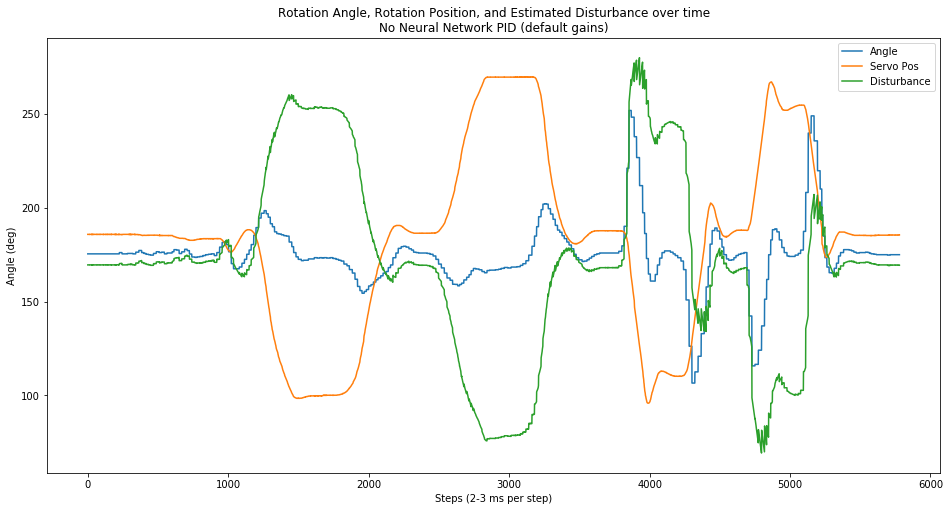

In [42]:
df = pd.read_csv('NN PID Results/nn_pid_log_no_nn.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\nNo Neural Network PID (default gains)')

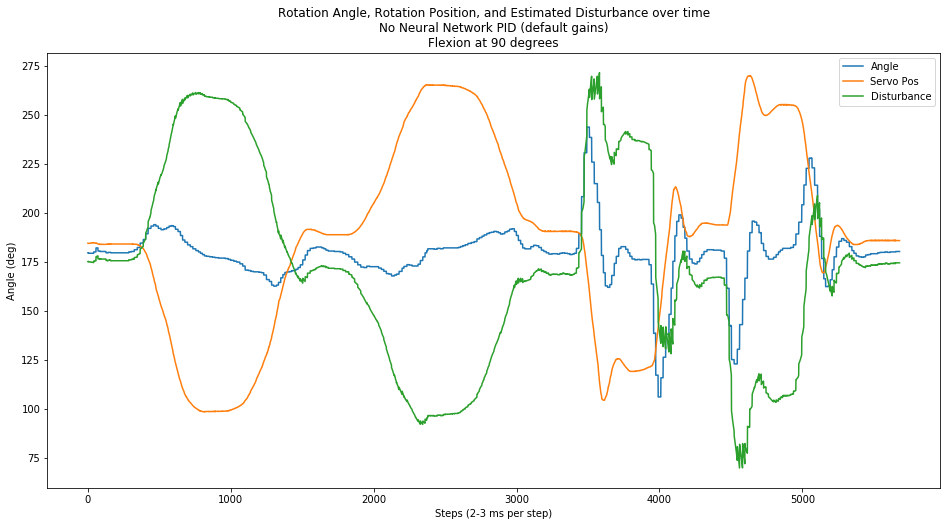

In [43]:
df = pd.read_csv('NN PID Results/nn_pid_log_no_nn_flex_up.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\nNo Neural Network PID (default gains)\nFlexion at 90 degrees')

# Lag in angle reading

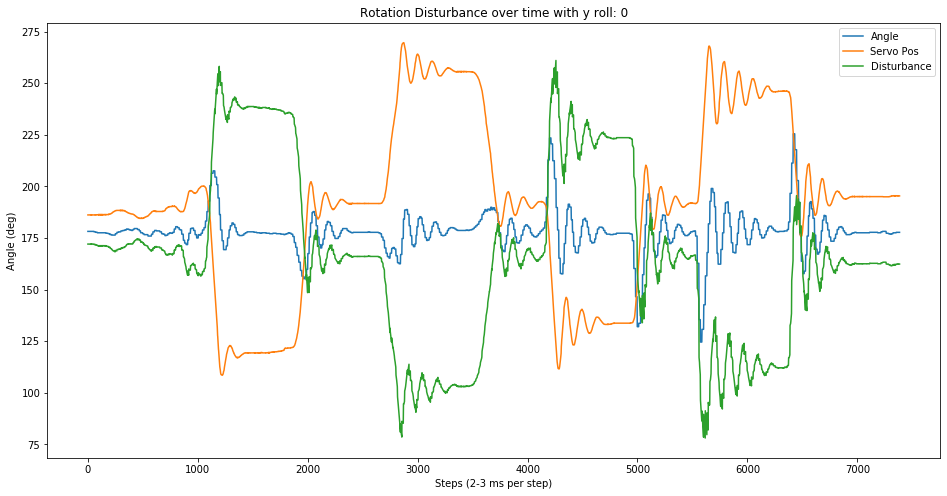

In [30]:
#Disturbance should be relatively flat
#dt=0.005 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=10 deg
df = pd.read_csv('NN PID Results/nn_pid_log_5ms.txt', sep=',')
plot_results(df, 'Rotation Disturbance over time with y roll: 0', 0)

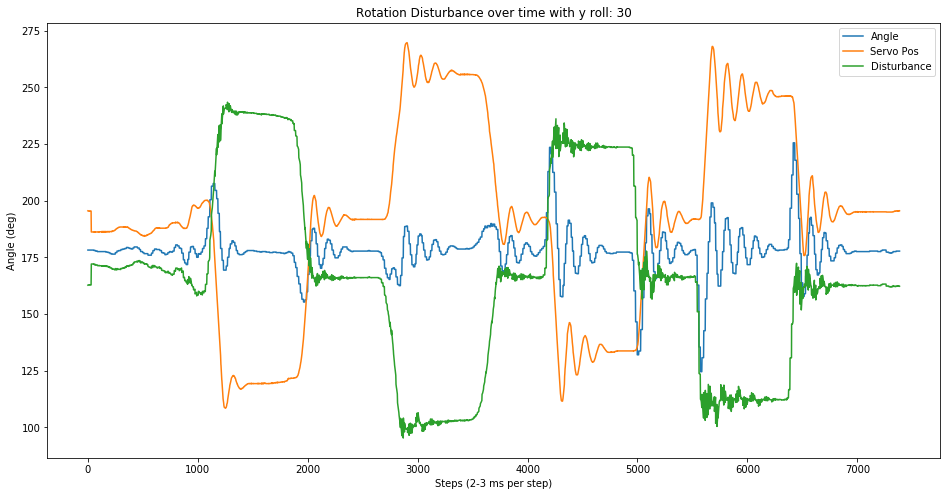

In [31]:
#Delay the servo position reading by 30 time steps
#Approximately a 90ms lag for angle readings
#The gravity vector is read at 100Hz (0.01s = 10ms)
#Readings from arduino are sent back to brachioplexus every 40ms
plot_results(df, 'Rotation Disturbance over time with y roll: 30', 30)

# Results from NN PID training

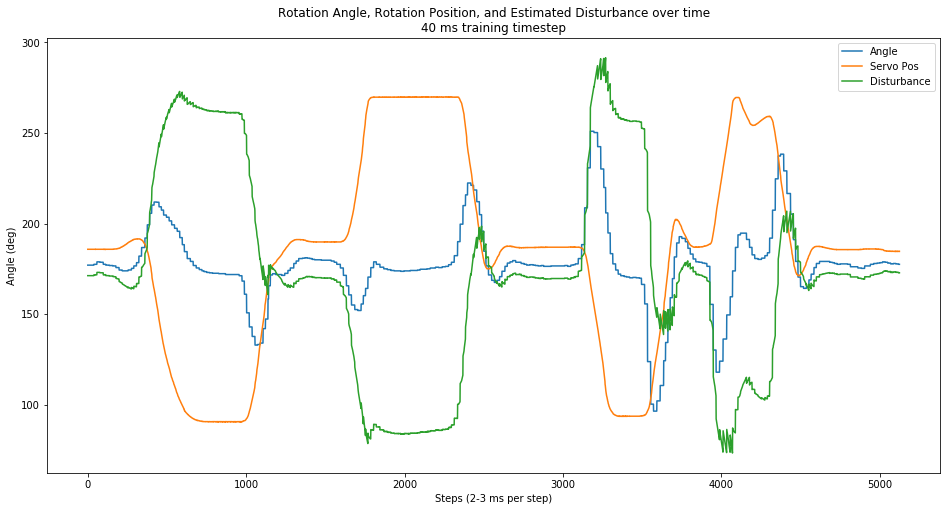

In [32]:
#dt=0.04 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=10 deg
df = pd.read_csv('NN PID Results/nn_pid_log_40ms.txt', sep=',')
#Oscillations on when the servo angle is positive for some reason
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n40 ms training timestep')

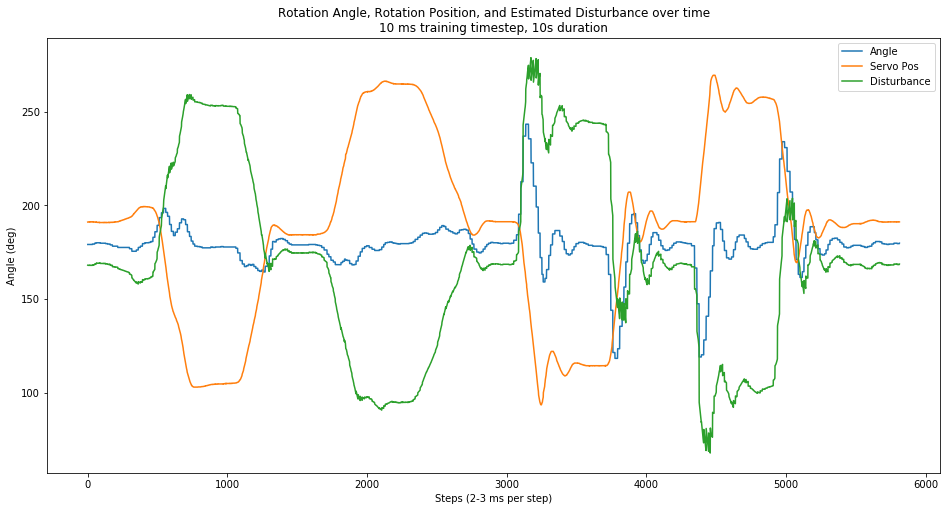

In [33]:
#dt=0.04 s, length=10 s, aprbs_hold=1.0 s, aprbs_amp=10 deg
df = pd.read_csv('NN PID Results/nn_pid_log_40ms_10s.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n10 ms training timestep, 10s duration')

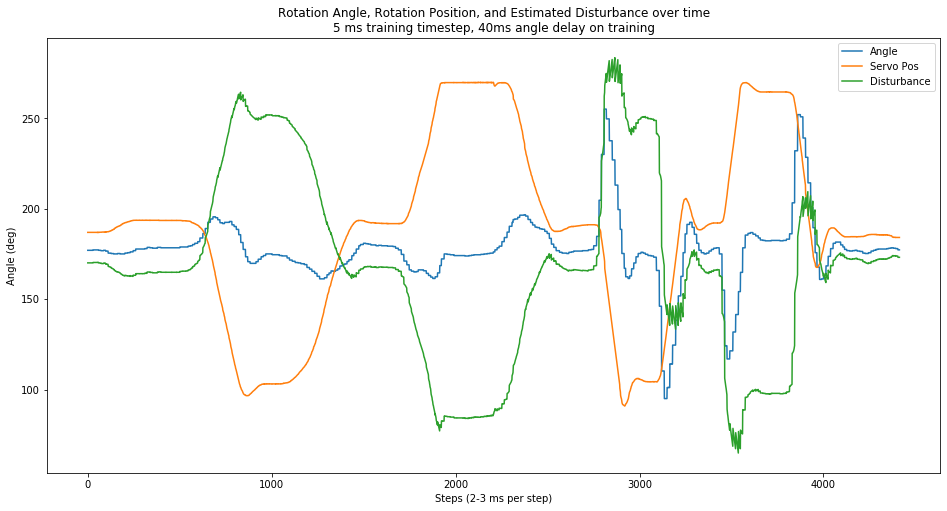

In [34]:
#dt=0.005 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=10 deg
#angle_delay = int(0.04 / 0.005) Delay 40ms

df = pd.read_csv('NN PID Results/nn_pid_log_5ms_angle_delay.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n5 ms training timestep, 40ms angle delay on training')

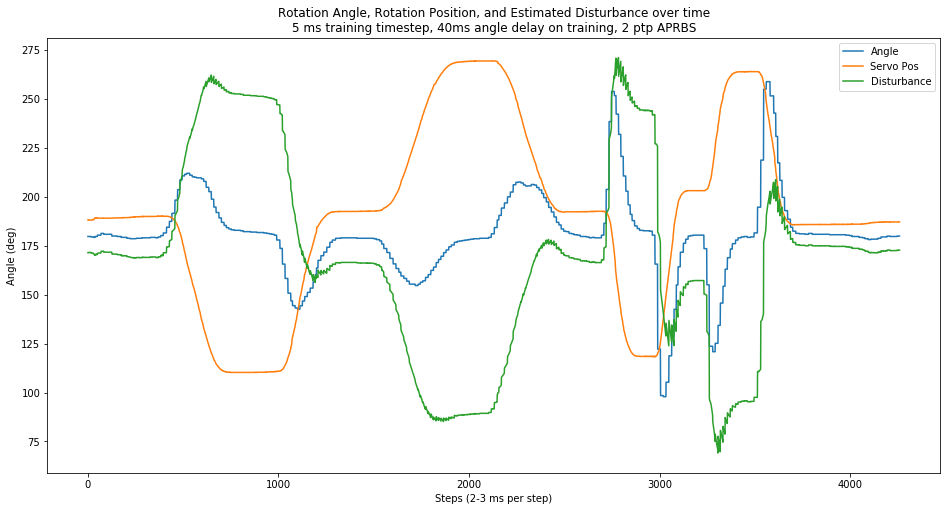

In [35]:
#dt=0.005 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=2 deg
#angle_delay = int(0.04 / 0.005) Delay 40ms

df = pd.read_csv('NN PID Results/nn_pid_log_5ms_angle_delay_2ptp.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n5 ms training timestep, 40ms angle delay on training, 2 ptp APRBS')

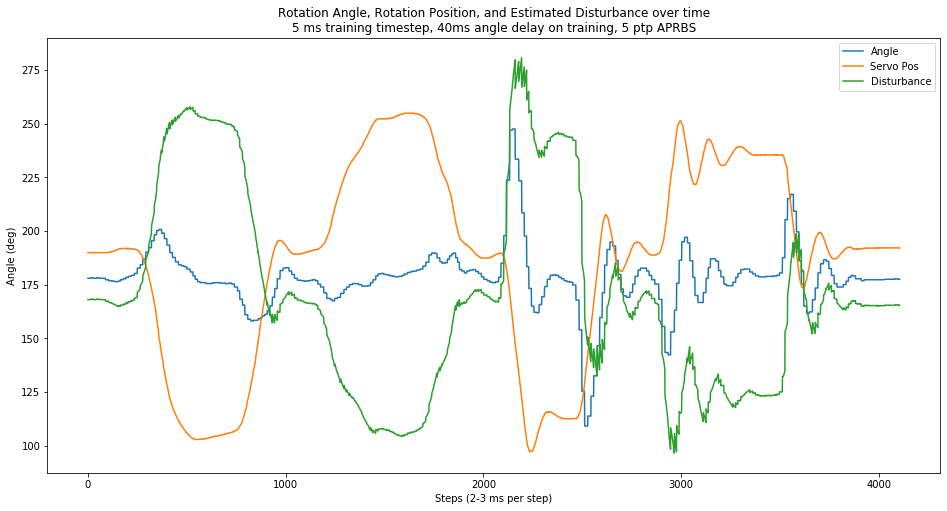

In [36]:
#dt=0.005 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=5 deg
#angle_delay = int(0.04 / 0.005) Delay 40ms

df = pd.read_csv('NN PID Results/nn_pid_log_5ms_angle_delay_5ptp.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n5 ms training timestep, 40ms angle delay on training, 5 ptp APRBS')

A lot of this is very sensitive to the initialization
Re-initialize if the mse is greater than the max APRBS amplitude

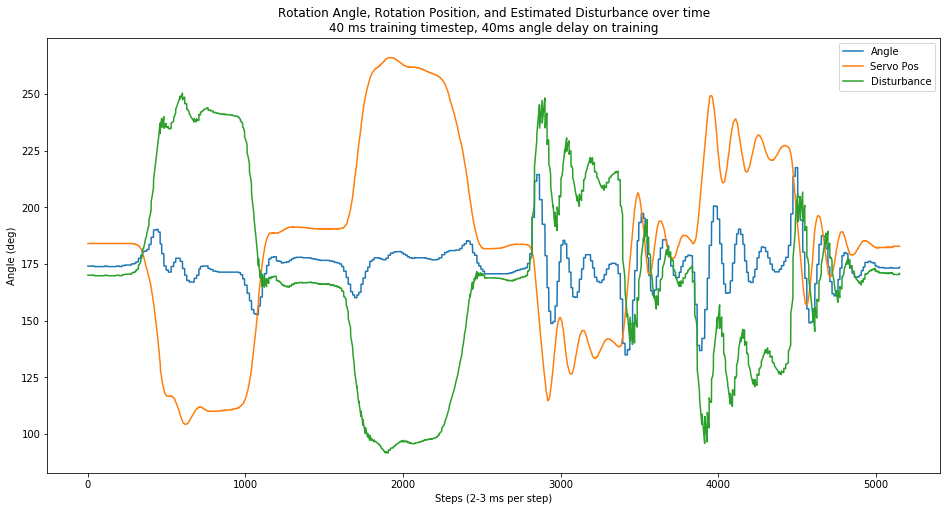

In [37]:
#dt=0.04 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=10 deg
#angle_delay = int(0.04 / 0.04) Delay 40ms

df = pd.read_csv('NN PID Results/nn_pid_log_40ms_angle_delay.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n40 ms training timestep, 40ms angle delay on training')

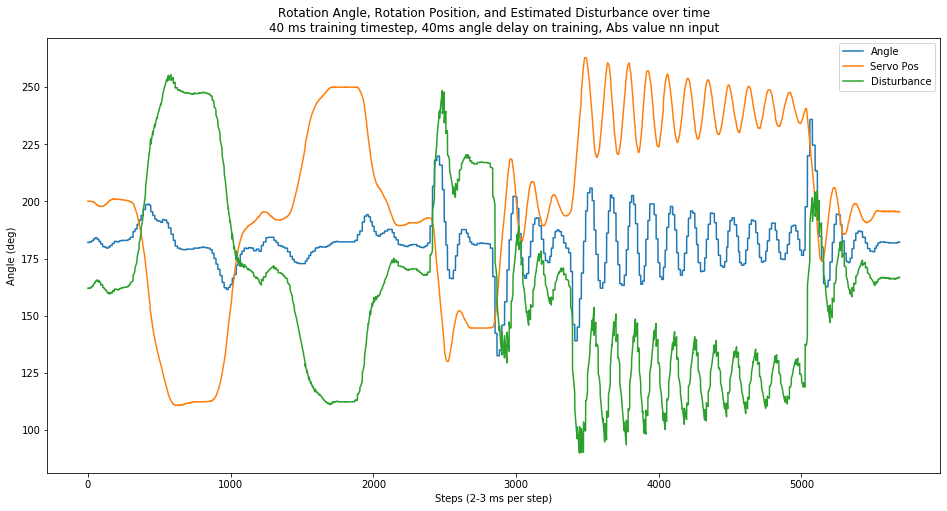

In [38]:
#dt=0.04 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=10 deg
#angle_delay = int(0.04 / 0.04) Delay 40ms
#Abs val nn input

df = pd.read_csv('NN PID Results/nn_pid_log_40ms_angle_delay_abs.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n40 ms training timestep, 40ms angle delay on training, Abs value nn input')

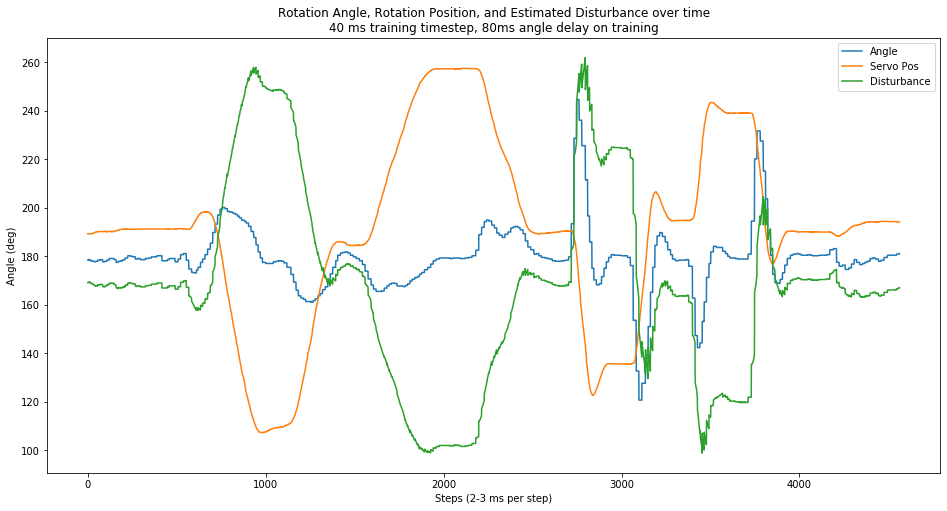

In [39]:
#dt=0.04 s, length=5 s, aprbs_hold=0.5 s, aprbs_amp=10 deg
#angle_delay = int(0.08 / 0.04) Delay 80ms

df = pd.read_csv('NN PID Results/nn_pid_log_40ms_angle_delay_double.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n40 ms training timestep, 80ms angle delay on training')

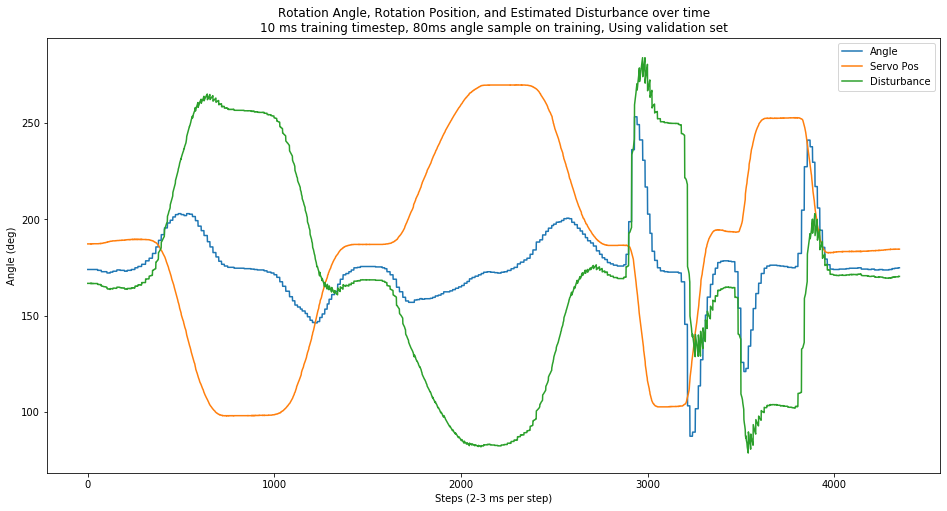

In [40]:
df = pd.read_csv('NN PID Results/nn_pid_log_2.0.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n10 ms training timestep, 80ms angle sample on training, Using validation set')

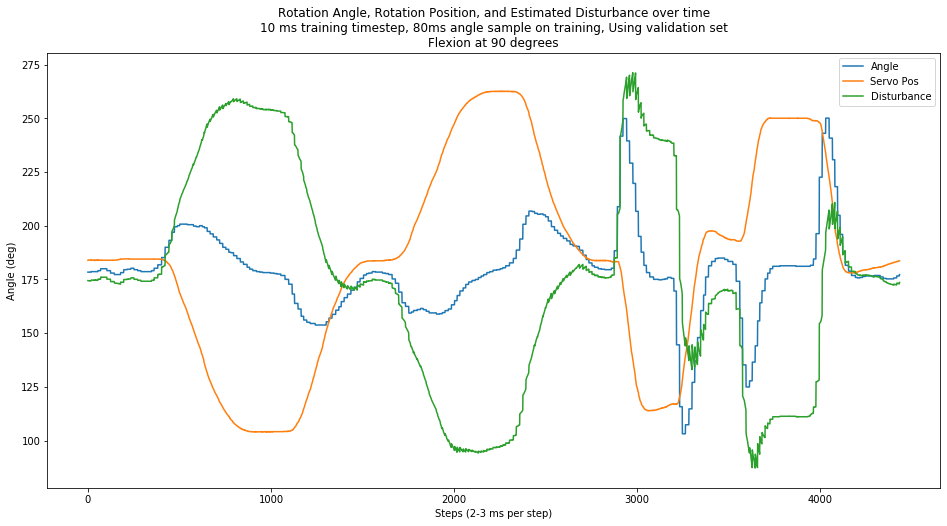

In [44]:
df = pd.read_csv('NN PID Results/nn_pid_log_2.0_flex_up.txt', sep=',')
plot_results(df, 'Rotation Angle, Rotation Position, and Estimated Disturbance over time\n10 ms training timestep, 80ms angle sample on training, Using validation set\nFlexion at 90 degrees')

# Comparing step response of No Tuning vs NN Tuned

In [159]:
def get_T(df):
    T = []
    dt_str = df.iloc[0]['timestamp'].split(':')
    temp = dt_str.pop()
    dt_str.extend(temp.split('.'))
    first_time = datetime(2019, 8, 12, int(dt_str[0]), int(dt_str[1]), int(dt_str[2]), 
                               int(dt_str[3]) * 1000)
    for row in df.iterrows():
        dt_str = row[1]['timestamp'].split(':')
        temp = dt_str.pop()
        dt_str.extend(temp.split('.'))
        cur_time = datetime(2019, 8, 12, int(dt_str[0]), int(dt_str[1]), int(dt_str[2]), 
                                   int(dt_str[3]) * 1000)
        delta = (cur_time - first_time)
        T.append(round(delta.seconds + delta.microseconds/1000/1000, 3))
    T = np.array(T)
    
    return T, np.where(T >= 1.4)[0][0]

def plot_step(df, title):
    r = np.array(df['setpoint_phi']) #Setpoint
    angle = np.array(df['phi']) #Angle from setpoint
    y = (df['rot_pos'] - 2048) * math.pi/2048 #Servo position in radians
    T, cutoff = get_T(df)
    T = T[:cutoff]
    
    plt.plot(T, r[:cutoff])
    plt.plot(T, angle[:cutoff])
    plt.plot(T, y[:cutoff] * 180/math.pi + 180)
    plt.legend(['Setpoint', 'Angle', 'Servo Pos'])
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (deg)')
    plt.title(title)
    plt.show()
    
    Kp = df['Kp_phi']
    Ki = df['Ki_phi']
    Kd = df['Kd_phi']
    plt.plot(T, Kp[:cutoff])
    plt.plot(T, Ki[:cutoff])
    plt.plot(T, Kd[:cutoff])
    plt.legend(['Kp', 'Ki', 'Kd'])
    plt.xlabel('Time (s)')
    plt.ylabel('Gain')
    plt.title('Output gains for ' + title)
    plt.show()
    
def calc_ITSE(df):
    r = np.array(df['setpoint_phi'])
    angle = np.array(df['phi'])
    T, cutoff = get_T(df)
    T = T[:cutoff]

    t_prev = 0
    ITSE = 0
    for i in range(len(r[:cutoff])):
        dt = T[i] - t_prev
        ITSE += T[i] * (r[i] - angle[i])**2 * dt
        t_prev = T[i]
    return ITSE

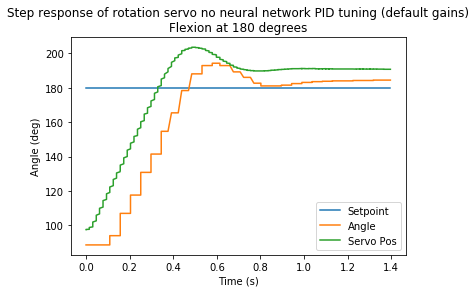

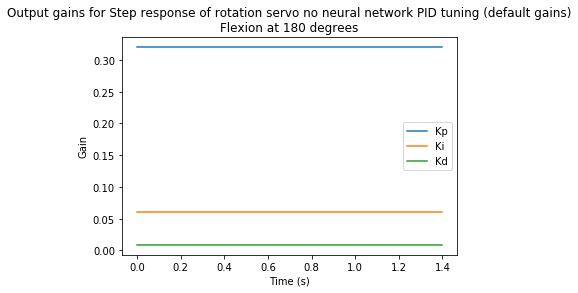

ITSE No Neural Network PID: 292.6460135700377


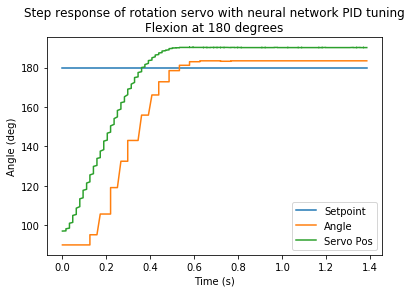

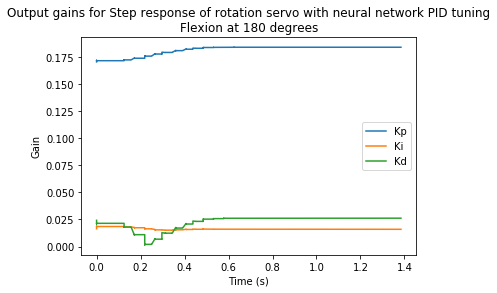

ITSE with Neural Network PID: 275.90537947366124


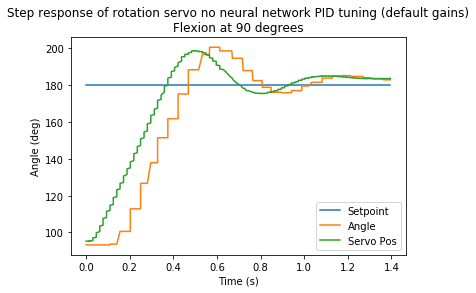

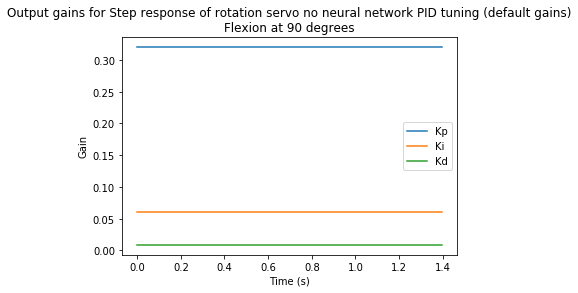

ITSE No Neural Network PID: 325.44119221434215


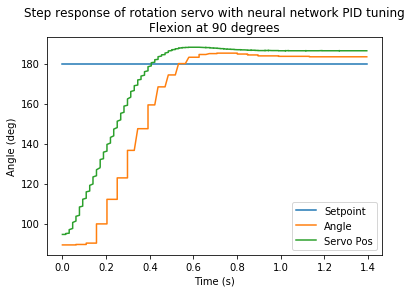

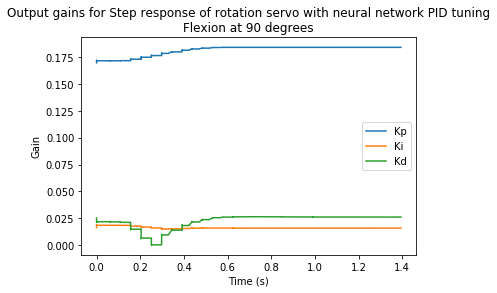

ITSE with Neural Network PID: 326.00266241094266


In [160]:
df_no_nn = pd.read_csv('NN PID Results/Step Responses/step_response_no_nn.txt', sep=',')
plot_step(df_no_nn, "Step response of rotation servo no neural network PID tuning (default gains)\nFlexion at 180 degrees")
print("ITSE No Neural Network PID:", calc_ITSE(df_no_nn))

df_nn = pd.read_csv('NN PID Results/Step Responses/step_response_nn.txt', sep=',')
plot_step(df_nn, "Step response of rotation servo with neural network PID tuning\nFlexion at 180 degrees")
print("ITSE with Neural Network PID:", calc_ITSE(df_nn))

df_no_nn_flex_90 = pd.read_csv('NN PID Results/Step Responses/step_response_no_nn_flex_90.txt', sep=',')
plot_step(df_no_nn_flex_90, "Step response of rotation servo no neural network PID tuning (default gains)\nFlexion at 90 degrees")
print("ITSE No Neural Network PID:", calc_ITSE(df_no_nn_flex_90))

df_nn_flex_90 = pd.read_csv('NN PID Results/Step Responses/step_response_nn_flex_90.txt', sep=',')
plot_step(df_nn_flex_90, "Step response of rotation servo with neural network PID tuning\nFlexion at 90 degrees")
print("ITSE with Neural Network PID:", calc_ITSE(df_nn_flex_90))